Nome: Gabriel Stankevix Soares

# DataSet - Credito Alemao



Conjunto de dados sobre emprestimo de crédito alemão.
Este conjunto de dados classifica o risco de credito de pessoas, por meio de 20 atributos, como risco bom ou risco ruim.

Classes
Bom 
Ruim 


É pior classificar  um cliente bom como ruim, do que classificar um cliente ruim quando ele é bom.

Este dataset foi escolhido por ser um tema recorrente no dia a dia e pela sua variedade de atributos disponiveis para analise e desenvolvimento de modelos.

**Descrição do atributo**

1. Situação da conta corrente existente, em marcos alemães.
2. Duração em meses
3. Histórico de crédito (créditos recebidos, pagos devidamente, atrasos, contas críticas)
4. Objetivo do crédito (carro, televisão, ...)
5. Montante de crédito
6. Situação da conta de poupança / títulos, em marcos alemães.
7. Emprego atual, em número de anos.
8. Taxa de parcelamento em porcentagem da renda disponível
9. Status pessoal (casado, solteiro, ...) e sexo
10. Outros devedores / fiadores
11. Atual residência desde X anos
12. Propriedade (por exemplo, imóveis)
13. Idade em anos
14. Outros planos de parcelamento (bancos, lojas)
15. Habitação (aluguel, próprio, ...)
16. Número de créditos existentes neste banco
17. Trabalho
18. Número de pessoas responsáveis ​​por fornecer manutenção para
19. Telefone (sim, não)
20. Trabalhador estrangeiro (sim, não)

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving dataset_31_credit-g.csv to dataset_31_credit-g (1).csv


## Analise Exploratoria de Dados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io

sns.set(style="darkgrid")

In [ ]:
credit = pd.read_csv(io.BytesIO(uploaded['dataset_31_credit-g.csv']))

In [ ]:
credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


Dataset eh composto por 700 pessoa com risco de credito bom e 300 pessoas com risco de credito mau.

In [ ]:
credit['class'].value_counts()

good    700
bad     300
Name: class, dtype: int64

Ao total são 20 variaveis + classe que descrevem a pessoa com potencial de credito bom ou ruim

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [ ]:
credit.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


Existe uma correlação forte positiva entre o tempo de duração do credito com o monte de valores solicitados, para as demais variaveis não foi possivel encontrar uma correlação sigfinicativa

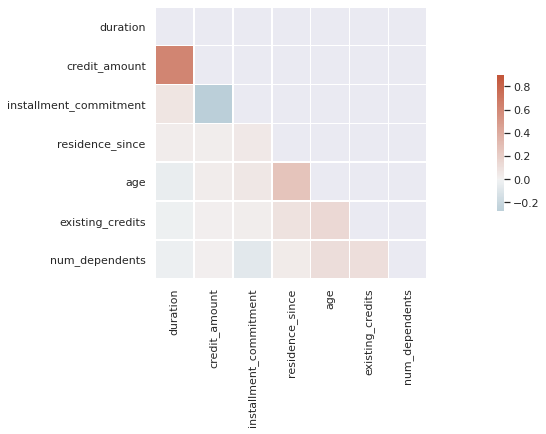

In [ ]:
credit_corr = credit.corr()

mask = np.triu(np.ones_like(credit_corr, dtype=bool))

f, ax = plt.subplots(1,figsize=(25, 5))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(credit_corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


Algumas caracteristicas interessantes neste dataset é que as pessoas com maior idade, mais tempo que duração de credito e com historico de emprestimos compoem a classe denominada como boa.

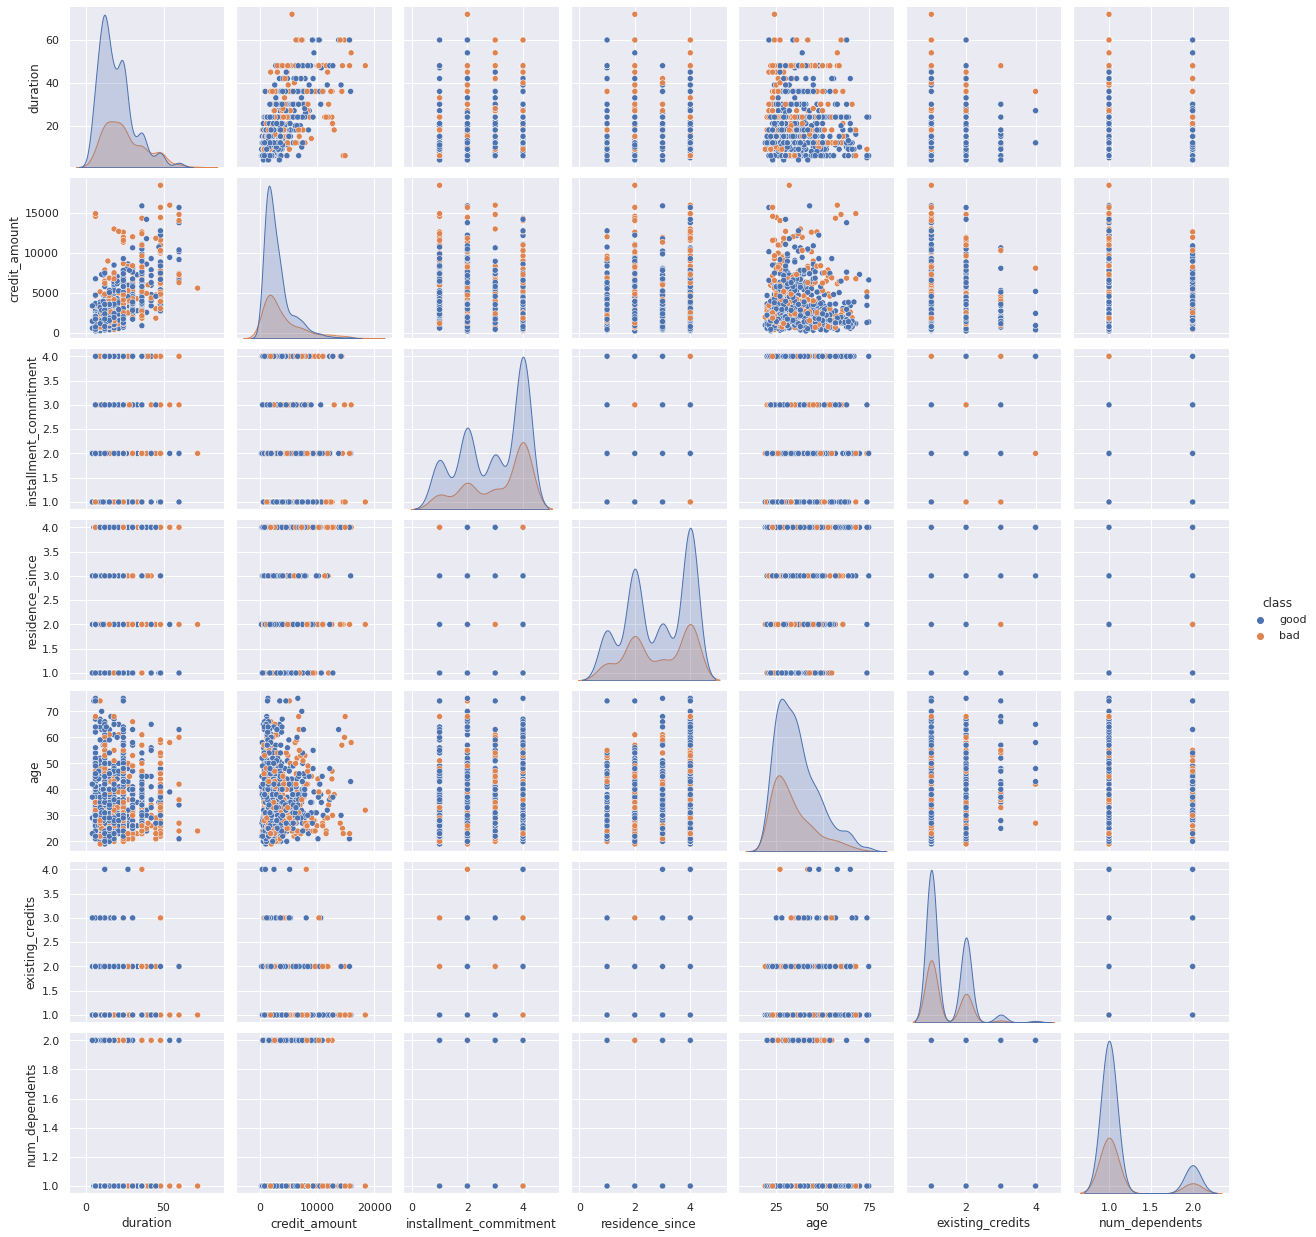

In [ ]:
sns.pairplot(credit,hue='class')

Como destaque das variveis categoricas a maior parte das pessoas ja tinha algum historico de credito pago, tanto boas quanto ruins.



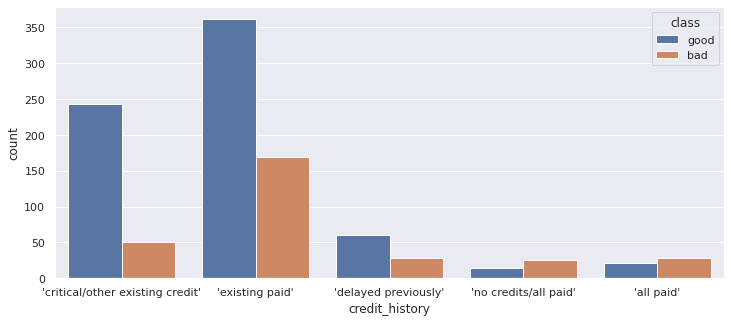

In [ ]:
f, axes = plt.subplots(1, figsize=(12,5))
f = sns.countplot(x='credit_history', data=credit,ax=axes, hue='class')
plt.show()

Credito de compra são destinados principalmente para compra de radio/tv, carro novo ou mobilia. Pessoal com classe 'bad' ruim de credito tem maior incidencia em compra de carros novos

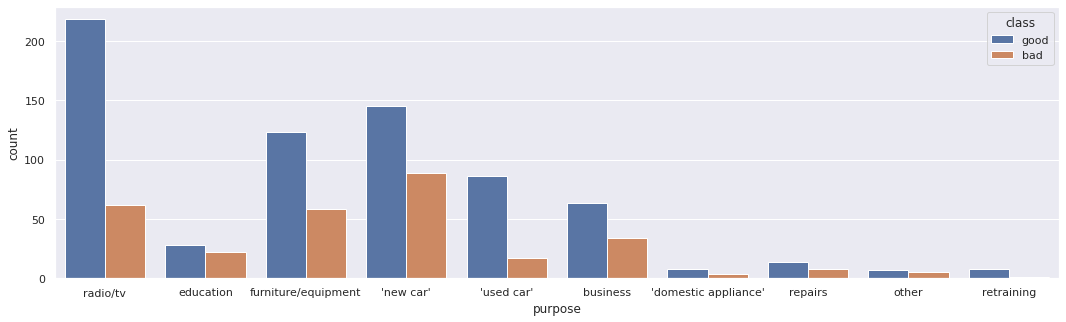

In [ ]:
f, axes = plt.subplots(1, figsize=(18,5))
f = sns.countplot(x=credit.purpose, data=credit,ax=axes, hue='class')
plt.show()

Maioria das pessoas são trabalhadores qualificados 'skilled'

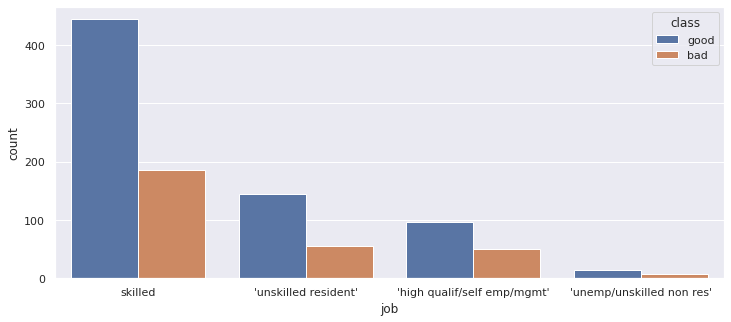

In [ ]:
f, axes = plt.subplots(1, figsize=(12,5))
f = sns.countplot(x=credit.job, data=credit,hue='class',ax=axes)
plt.show()

# Modelagem

Escolha do algoritmo de RNAs foi a RNA chamada MLP ou Multiçayer Perceptron.

Este é um tipo clássico de rede neural composta por uma ou mais neurônio. Os dados são alimentados para uma camada de entrada, pode haver uma ou mais camadas ocultas fornecendo níveis de abstração e as previsões são feitas na camada de saída, também chamada de camada visível. 

Desta forma é adequado para resolver o nosso problema de classificação criando camadas e conexões entre as 20 variaveis disponveis para definir o rotulo ideal.

Neste estudo não será feito feature importance para selecionar as variaveis mais importantes.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler,OneHotEncoder,RobustScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer

## Construção Pipeline

Dados foram divididos entre 30 % teste e 70 % treinamento, com 20 variaveis do tipo categorica e inteiro. A medida de performance padrão aplicada foi a acuracia e posteriormente medido a recall pois existe um alto custo associado a falso negativos neste problema.

In [ ]:
X = credit.drop("class", axis=1)
y = credit['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)

In [ ]:
numerical_features = X.select_dtypes("int64").columns
categorical_features = X.select_dtypes(include=['object']).columns

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
transf = preprocessor.fit(X)
transf

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num',
                                 Pipeline(memory=None,
                                          steps=[('scaler',
                                                  MinMaxScaler(copy=True,
                                                               feature_range=(0,
                                                                              1)))],
                                          verbose=False),
                                 Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object')),...
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'nu

In [ ]:
xtrain_prepared = transf.transform(X_train)
xtrain_prepared.shape

(700, 61)

In [ ]:
xtest_prepared = transf.transform(X_test)
xtest_prepared.shape

(300, 61)

## MLP Model

Investigação feita neste modelo MLP foi para definir or melhores parametros para tax de aprendizado e o numero ideal de iterações que a rede precisa.

In [ ]:
mlp = MLPClassifier(max_iter=1000)

params_mlp = {
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs','sgd','adam'],
    'learning_rate' : ['constant', 'invscaling', 'adaptive']
}


grid_mlp = GridSearchCV(estimator = mlp,
                       param_grid = params_mlp,
                       scoring ='accuracy',
                       cv = 2,
                       verbose = 1,
                       n_jobs = -1)

grid_mlp.fit(xtrain_prepared, y_train.ravel())

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   35.8s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=1000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...rue,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': 

In [ ]:
print('CV Score for best MLP Classifier model: {:.2f}'.format(grid_mlp.best_score_))

CV Score for best MLP Classifier model: 0.74


In [ ]:
best_model_mlp = grid_mlp.best_estimator_
best_model_mlp

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Modelo selecionado tem os parametros definidos como 

**learning_rate='adaptive'** - Mantém a taxa de aprendizagem constante referente ao valor de learning rate inicial enquanto a perda de treinamento continua diminuindo. 
Cada vez que duas epochs* consecutivas falham em diminuir a perda de treinamento ou falham em aumentar a pontuação de validação, a taxa de aprendizado atual é dividida por 5.

**activation='tanh'** - a função tan hiperbólica, retorna f (x) = tanh (x).

**solver='sgd'** - 'Sgd' refere-se à descida gradiente estocástica

*epochs:  é um hiperparâmetro que define o número de vezes que o algoritmo de aprendizado funcionará em todo o conjunto de dados de treinamento.



## Validacao Modelo

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,recall_score

In [ ]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', best_model_mlp)])

In [ ]:
pipe.fit(X_train, y_train.ravel()) 

pred_test = pipe.predict(X_test)
accuracy_result = accuracy_score(y_test, pred_test)
    
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         bad       0.62      0.43      0.51        90
        good       0.78      0.89      0.83       210

    accuracy                           0.75       300
   macro avg       0.70      0.66      0.67       300
weighted avg       0.74      0.75      0.74       300



Algoritmo obteve uma performance boa, com acuracia de 76 % em teste. Porem é preciso avaliar que neste caso a recomendação de pessoas boas de credito como ruins deve acontecer em uma escala menor.

A metrica recall indicou um valor de 89 % de precisão na predição de pessoas boas de credito que realmente era boas de creditc, o que indica uma boa performance graças ao custo alto associado aos falso negativos.